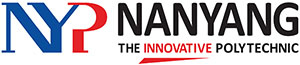

# Practical: Keras IMDB Binary Classifier



## Objectives

- Familiarize with the steps in Keras to configure and train an artificial neural network (ANN) for text data.
- Learn how to tranform the source text data as inputs for ANN.
- Learn how to apply L1, L2 and Dropout regularization to reduce overfitting.



## Introduction

We have previously seen how to setup a simple artificial neural network using Keras. We will now apply what we have learned to textual data. More specifically, we will apply it to the IMDB dataset. The IMDB dataset consists of movie reviews and we will use it to train an ANN and subsequently use the trained model to classify movie reviews as either positive or negative (binary classificaton).

In this practical, we will also demonstrate how to use L1, L2 and Dropout regularization techniques to reduce overfitting in deep learning.

A similar tutorial is available at https://www.tensorflow.org/tutorials/keras/text_classification that deals with the same dataset with Keras.

## Importing Required Python Libraries

Enter the following codes to import the Numpy and TensorFlow packages.

```python
import numpy as np
import tensorflow as tf

```

In [ ]:
#Imports packages here



## Loading Keras IMDB Movie Review Dataset

As we will be using the IMDB Movie Review data set for this practical, download and load the IMDB dataset using the following codes:

```python
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.imdb.load_data(num_words=10000)
```

We have specified the argument ```num_words=10000```, this will limit each review to the top 10000 words to make the dataset managable. Dataset involving text usually has large number of features and is relatively sparse. 

In [ ]:
#Load the dataset here



## Understanding the Data

We should examine the dataset to better understand the data we are working with before we decide how to tranform it in a form that is suitable for use in our ANN.

Print the shape of the four variables ```train_x```, ```train_y```, ```test_x```, ```test_y```.

<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>
    
    
```
print("train_x", train_x.shape)
print("train_y", train_y.shape)
print("test_x", test_x.shape)
print("test_y", test_y.shape)
```


In [ ]:
#Enter your codes here


You should be able to see that we have 25000 samples for each of the training and testing data and their associated labels.

Let us now examine the data closely in order to understand how the text data are organized. 

The first movie review is ```train_x[0]```, let us print out the number of words for the first review using the following codes:

```python
print("Number of words for first review =", len(train_x[0]))
```

In [ ]:
# Enter your codes here



You should see that the first review has 218 words. 

Next let us print out the first movie review with the following codes:

```python
print(train_x[0])
```

In [ ]:
#Enter your codes here



You should see the first review in numerical form as shown below:

```
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
```

It is a list of indices instead of actual words themselves. Each number in the list maps to a word based in a dictionary called the _word_index_. By looking up the _word_index_, we can translate the review back to text. Let us take a look at the word index by printing out some entries. 

Enter and execute the following codes:

```python
def print_dict(dict, num_entries):
    for count, key in enumerate(dict):
        print(key, "->", dict[key])
        if count > num_entries: #Prints only 10 entries
            break    

word_index = tf.keras.datasets.imdb.get_word_index()
print_dict(word_index, 10)

```

In [ ]:
#Enter your codes here



You should be able to see a list of words and their corresponding index value 

```
fawn -> 34701
tsukino -> 52006
nunnery -> 52007
sonja -> 16816
vani -> 63951
woods -> 1408
spiders -> 16115
hanging -> 2345
woody -> 2289
trawling -> 52008
hold's -> 52009
comically -> 11307
```

For example, the word _fawn_ has the index 34701 and the word _tsukino_ has the index 52006. The word_index dictionary is used to convert every word in the reviews to the corresponding index number.

To verify that, let us do the reverse by converting the list of indices of the first review in the training set back to its original text. To do that, we will first need to create a dictionary that maps index to word instead of word to index.

Add the following codes and execute them:

```python
#Creates the reverse word index dictionary here
index_word = {value: key for key, value in word_index.items()} #Create the inverse index

#Let us print them out to take a look
print_dict(index_word, 10)
```

The above codes create a dictionary that maps indices to words and prints 10 entries in the dictionary.

In [ ]:
#Enter your codes to create the reverse word index dictionary here



You should see the following printout:
```
34701 -> fawn
52006 -> tsukino
52007 -> nunnery
16816 -> sonja
63951 -> vani
1408 -> woods
...
```

The printout shows the dictionary with the indices as numbers and we are able to map to the corresponding words.

We can now convert indices to the words. Let us convert ```train_x[0]``` from array of indices to the corresponding words.

Enter the following codes and run them:

```python
print(train_x[0])
text = ""

for index in train_x[0]: 
    text += index_word.get(index-3, "") + " " 
text = text.strip() #trim white space
print(text)
```

In the codes, we iterates through every in index number in the list. We get the word corresponding to the index and add it to the text string. Note that the number -3 is needed because 0, 1, 2 in the dictionary are used to indicate 'padding', 'start' and 'unknown'. The second argument for the ```get()``` function indicates that empty string "" to be returned if the index is not found.


In [ ]:
#Enter your codes here



You should see the following results:

```
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all
```

You can see the encoded list of indices and the recovered text. As can we seen from the output, the text are readable and makes sense, so we are confident that we are correct in interpreting the data.

Going through this exercise should provide you with a good understanding of how each review is encoded as a list of indices to the words stored in the ```word_index``` dictionary.

## Preparing Data as Tensors

We are now aware that the dataset consists of a list of indices of words. However, this still cannot be used as the input to the neural network. A common approach to feeding text data into a neural network is to one-hot encode the data. That is, transform the data such that we have each word as a feature and uses 1 or 0 to indicate if a word exists in the review. It is a 2-D tensor and some examples are shown below:

| Reviews | word1 | word2 | word3 | word4 |
|---------|-------|-------|-------|-------|
| Review1 | 1     | 0     | 1     | 1     |
| Review2 | 1     | 1     | 0     | 1     |
| Review3 | 0     | 0     | 1     | 1     |

The rows are the individual text documents (reviews) and the columns are the features (words).

We have requested to limit the number of words to 10000 when we loaded the dataset and we have also seen that the total number of rows is 25000 based on the shape of the train_data. So, to convert, we will first create a 2-D numpy array of 25000 x 10000. The array will be initialized with zeros. We will then set the values to be 1 based on the indices of the word.

Add the following codes that convert each review into a one-hot encoded data:

```python
def convert_one_hot(data):
    data_one_hot = np.zeros(shape =(len(data), 10000)) #rows = len(train_data), column = 10000 words/features
    i = 0
    for review in data:
        data_one_hot[i, review] = 1.0
        i += 1
    return data_one_hot

train_x_one_hot = convert_one_hot(train_x)
test_x_one_hot = convert_one_hot(test_x)

print(train_x_one_hot)
```

We also print out the training data and check if it is of the format that we want.


In [ ]:
#Enter your codes here


You should see outputs as follows:

```
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
```

It is a list of lists (2-dimensional array) of 0s and 1s. The locations of 1s correspond to the presence of a word in a review and 0 otherwise. Also check that the shape of the training data is (25000, 10000). That is 25000 reviews with 10000 words as features.

## Preparing Label Data

So far, we have looked at the input data, let us now look at the labels. Print samples of the ```train_y``` and ```test_y``` as well as the shapes.

<details>
    <summary><strong>Click here to see codes</strong></summary>
    
```python
print(train_y.shape)
print(test_y.shape)
print(train_y)
print(test_y)
```
</details>

In [ ]:
#Enter your codes here


You should see that the labels are just a list of 0s and 1s since we are training a binary classifier. In our ANN, we will be using sigmoid as our activation function in the output layer and it will be of type ```float32```. So let us convert our labels to ```float32``` using the following codes:

```python
train_y = train_y.astype(np.float32)
test_y = test_y.astype(np.float32)
```

In [ ]:
#Enter your codes here



The data is now ready for training our model.


## Defining the Neural Network Model

In this practical, we will define 3 layers:

1. A hidden layer with 16 neuron units accepting data with 10000 features, using RELU activation function
2. Another hidden layer with 16 neuron units and again using RELU activation function
3. An output layer with 1 neuron unit and the Sigmoid activation function.

Enter the following codes to setup your neural network model:

```ptyhon
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
```

We have chosen sigmoid as the output layer activation function because it is suitable for binary outputs. It output a floating point value between 0 and 1 indicating how likely the output will be True (positive review).

In [ ]:
#Enter your codes here



## Compiling the Model

For compilation of the model, we need to choose a __loss__ and and __activation function__. The metrics to use is accuracy.

For binary classifier, we usually uses the ```binary_crossentropy``` as the loss function. We will also use the ```rmsprop``` optimizer.  Add the following codes for compiling the model defined previously:

```python
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
```


In [ ]:
#Enter your codes here



## Training the Model

One we have defined our optimizer, loss function and the metrics we are interested in monitoring, we can begin our training.

Enter the following codes to train our model.

```python
EPOCHS = 10
history = model.fit(train_x_one_hot, train_y, epochs=EPOCHS, validation_data=(test_x_one_hot, test_y))
```

In the above codes, we define EPOCHS to be 10, sets the training and validation dataset. Note also that we have assigned the return value of ```model.fit()``` to a variable called ```history```.

In [ ]:
#Enter your codes here to start training the model



You should see the print-out similar to the one shown below:

```
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 257us/sample - loss: 0.3230 - accuracy: 0.8705 - val_loss: 0.2811 - val_accuracy: 0.8870
Epoch 2/10
25000/25000 [==============================] - 6s 226us/sample - loss: 0.2121 - accuracy: 0.9184 - val_loss: 0.3077 - val_accuracy: 0.8794
...
Epoch 9/10
25000/25000 [==============================] - 6s 223us/sample - loss: 0.1052 - accuracy: 0.9660 - val_loss: 0.4304 - val_accuracy: 0.8684
Epoch 10/10
25000/25000 [==============================] - 6s 226us/sample - loss: 0.0950 - accuracy: 0.9703 - val_loss: 0.5139 - val_accuracy: 0.8594
```

Notice that in the above printout, we reach an accuracy of 97.03% on training data but only 85.94% accuracy for validation data. Furthermore, _loss_ from training data is 0.0950 while that of validation data is 0.5139. There seems to be some overfitting.

## Overfitting and Regularization

Let us visualize the change in the loss and accuracy values during training. We can do this using the ```history``` object returned by the ```fit()``` function.

Take a look at the data in the history object by printing the values as follows:

```python
print(history.history)
```

In [ ]:
#Print the training history 



You should see printout as follows:

```
{'loss': [0.32295897408485413, 0.21214997361660004, 0.18087404850125313, 0.16205355244755745, 0.14680875492811202, 0.13435420249760152, 0.1241288425195217, 0.11404623887240886, 0.10521883769154548, 0.09500146363973618], 'accuracy': [0.87048, 0.91836, 0.93076, 0.94152, 0.94808, 0.95328, 0.95708, 0.9624, 0.966, 0.97032], 'val_loss': [0.28109024436950686, 0.30771248495101927, 0.31234711921691893, 0.3329161572170258, 0.36188656456947327, 0.38027415642738344, 0.3915017540693283, 0.467834535574913, 0.4304078968381882, 0.5138695275115966], 'val_accuracy': [0.88696, 0.87936, 0.88104, 0.87672, 0.875, 0.87208, 0.87108, 0.86184, 0.8684, 0.85936]}


```

It contains history of ```loss```, ```accuracy```, ```val_loss``` and ```val_accuracy```. We can use it to plot a graph to show how the values change during the training process.

Use the following codes to plot the change of ```loss```, ```accuracy```, ```val_loss``` and ```val_accuracy``` during training:

```python
import matplotlib.pyplot as plt
history_dict = history.history

fig, (p1, p2) = plt.subplots(1, 2, figsize=(15,5))

x = range(1, EPOCHS+1)

p1.plot(x, history_dict['loss'], 'r', label='Training Loss')
p1.plot(x, history_dict['val_loss'], 'b', label='Validation Loss')
p1.set_title('Training and Validation Loss')
p1.set_xlabel('Epochs')
p1.set_ylabel('Loss')
p1.legend()

p2.plot(x, history_dict['accuracy'], 'r', label='Training Accuracy')
p2.plot(x, history_dict['val_accuracy'], 'b', label='Validation Accuracy')
p2.set_title('Training and Validation Accuracy')
p2.set_xlabel('Epochs')
p2.set_ylabel('accuracy')
p2.legend()

plt.show()
```


In [ ]:
#Enter codes to plot loss and accuracy here



You should see graphs similar to the following figure:

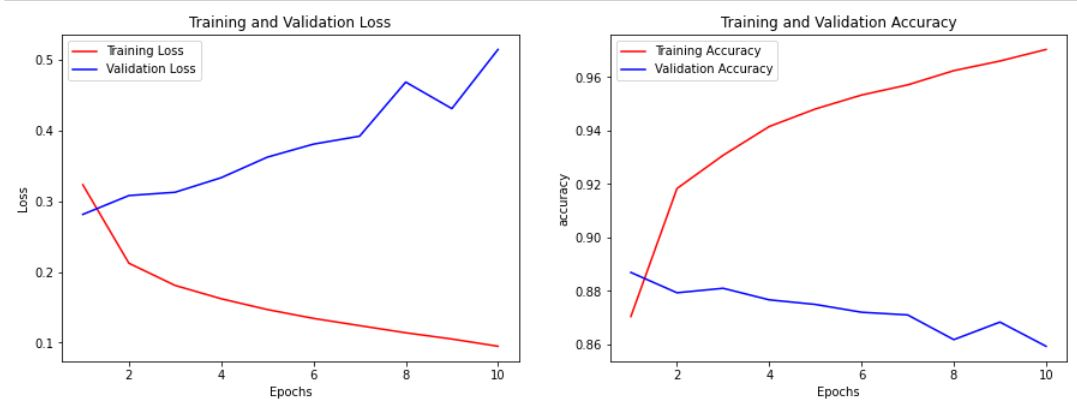

As can be seen from the plots, our validation accuracy actually does not increase much even when training accuracy increases substantially. Similarly the loss from validation set actually increases.


This shows that there are some overfitting in our model.


## Regularization

To reduce overfitting, the standard approach is to use regularization. We have a few options:

1. Use L1 (Sum of Absolute Weights) Regularization
2. Use L2 (Sum of Squared Weights) Regularization
3. Use L1 and L2 Regularization together
4. Use Dropout

Let us now apply L1, L2 and dropout regularization strategies in Keras.



### L1 Regularization

To use L1 Regularization, we need to create a L1 regularizer and set the ```kernel_regularizer``` argument of the layer that we wish to apply the regularization. Modify our ANN models as shown below.

```python
#Enter your codes to model, compile and train the model with L1 regularizer.
#L1 Regularization
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01), input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Train the model
#rmspop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])    
history = model.fit(train_x_one_hot, train_y, epochs=EPOCHS, validation_data=(test_x_one_hot, test_y))
```

We set the ```kernel_regulaizer``` to a L1 regularizer argument (with parameter 0.01) for each of the hidden layers. Once we have done that, we compile and train the model again.

In [ ]:
#Enter your codes to model, compile and train the model with L1 regularizer.



You should see output similar to the one below:
```
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 7s 261us/sample - loss: 1.6369 - accuracy: 0.7572 - val_loss: 1.3603 - val_accuracy: 0.8199
Epoch 2/10
25000/25000 [==============================] - 6s 233us/sample - loss: 1.3538 - accuracy: 0.8324 - val_loss: 1.3637 - val_accuracy: 0.8268
...
Epoch 9/10
25000/25000 [==============================] - 6s 236us/sample - loss: 1.3392 - accuracy: 0.8507 - val_loss: 1.3310 - val_accuracy: 0.8520
Epoch 10/10
25000/25000 [==============================] - 6s 242us/sample - loss: 1.3391 - accuracy: 0.8517 - val_loss: 1.3330 - val_accuracy: 0.8518
```

Let us again plot the graph as we have done previously:

<details>
    <summary>
        <strong>Click here to see codes</strong>
    </summary>
    
```python
history_dict = history.history

fig, (p1, p2) = plt.subplots(1, 2, figsize=(15,5))

p1.plot(x, history_dict['loss'], 'r', label='Training Loss')
p1.plot(x, history_dict['val_loss'], 'b', label='Validation Loss')
p1.set_title('Training and Validation Loss (L1)')
p1.set_xlabel('Epochs')
p1.set_ylabel('Loss')
p1.legend()

p2.plot(x, history_dict['accuracy'], 'r', label='Training Acc')
p2.plot(x, history_dict['val_accuracy'], 'b', label='Validation Acc')
p2.set_title('Training and Validation Accuracy (L1)')
p2.set_xlabel('Epochs')
p2.set_ylabel('accuracy')
p2.legend()

plt.show()

```
</details>


In [ ]:
#Plot graph for L1 Reguarlization



You should see plots similar to the one below:

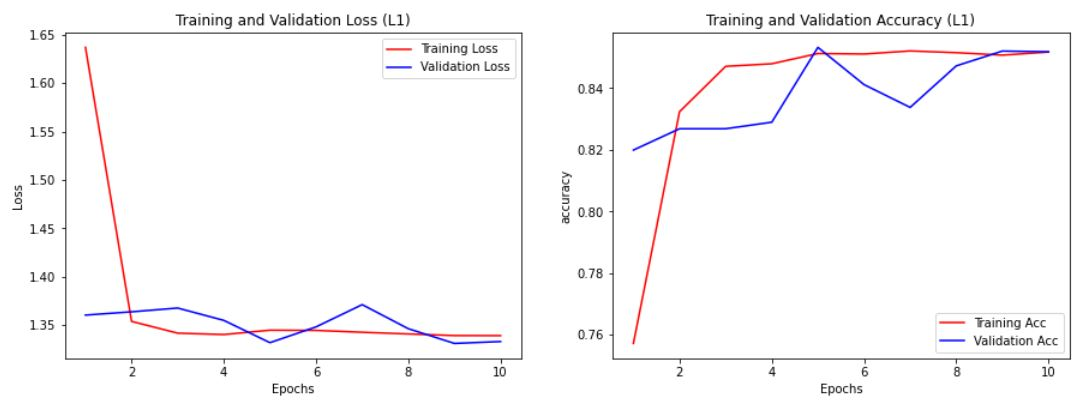

As can be seen from the graph the results are better compared to the one without regularization. The loss and accuracy are now more similar between the training and validation data.



### L2 Regularization

Similarly repeat the task with L2 regularization. Simply change the ```kernel_regularizer``` argument to ```kernel_regularizer=tf.keras.regularizers.l2(0.01)```.


<details>
    <summary><strong>Click here to see codes</strong></summary>
    
```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile and train
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])    
history = model.fit(train_x_one_hot, train_y, epochs=EPOCHS, validation_data=(test_x_one_hot, test_y))
```
</details>

In [ ]:
#Enter your codes here


You should obtain similar results as shown below:

```
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 7s 264us/sample - loss: 0.5022 - accuracy: 0.8536 - val_loss: 0.4355 - val_accuracy: 0.8691
Epoch 2/10
...
Epoch 9/10
25000/25000 [==============================] - 6s 230us/sample - loss: 0.3328 - accuracy: 0.8907 - val_loss: 0.3651 - val_accuracy: 0.8682
Epoch 10/10
25000/25000 [==============================] - 6s 231us/sample - loss: 0.3295 - accuracy: 0.8911 - val_loss: 0.3523 - val_accuracy: 0.8783

```

We are able to reduce ```val_loss``` to 0.3523 and increase ```val_acc``` to 0.8783.

### Dropouts

Dropout is one of the most popular regularization techniques in deep learning. Let us now use Dropout instead of L1 or L2 regularization. 

To apply dropout in Keras, we need to add dropout layers instead of using the arguments in the hidden layer.

Modify your ANN configuration to use Dropout layers as follows:

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dropout(rate=0.6)) #Dropout layer for regularization
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.6)) #Dropout layer for regularization
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
```



In [ ]:
#Enter your codes for Dropout Regularization here



Train and plot the graphs of loss and accuracy as you have done previously (without L1 or L2 regularization).

<details>
    <summary><strong>Click here to see codes</strong></summary>
    
```python
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])    
history = model.fit(train_x_one_hot, train_y, epochs=EPOCHS, validation_data=(test_x_one_hot, test_y))

history_dict = history.history

fig, (p1, p2) = plt.subplots(1, 2, figsize=(15,5))

p1.plot(x, history_dict['loss'], 'r', label='Training Loss')
p1.plot(x, history_dict['val_loss'], 'b', label='Validation Loss')
p1.set_title('Training and Validation Loss (Dropout)')
p1.set_xlabel('Epochs')
p1.set_ylabel('Loss')
p1.legend()

p2.plot(x, history_dict['accuracy'], 'r', label='Training Acc')
p2.plot(x, history_dict['val_accuracy'], 'b', label='Validation Acc')
p2.set_title('Training and Validation Accuracy (Dropout)')
p2.set_xlabel('Epochs')
p2.set_ylabel('accuracy')
p2.legend()

plt.show()

```
</details>

In [ ]:
#Enter codes to compile and train your model



The results should be similar to the one below:

```
WARNING:tensorflow:Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
WARNING:tensorflow:Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
WARNING:tensorflow:Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
25000/25000 [==============================] - 6s 257us/sample - loss: 0.5870 - accuracy: 0.6747 - val_loss: 0.3986 - val_accuracy: 0.8646
Epoch 2/10
25000/25000 [==============================] - 6s 232us/sample - loss: 0.4778 - accuracy: 0.7916 - val_loss: 0.3356 - val_accuracy: 0.8692
...
Epoch 9/10
25000/25000 [==============================] - 6s 237us/sample - loss: 0.4009 - accuracy: 0.8534 - val_loss: 0.3255 - val_accuracy: 0.8748
Epoch 10/10
25000/25000 [==============================] - 6s 235us/sample - loss: 0.3897 - accuracy: 0.8596 - val_loss: 0.3272 - val_accuracy: 0.8698

```

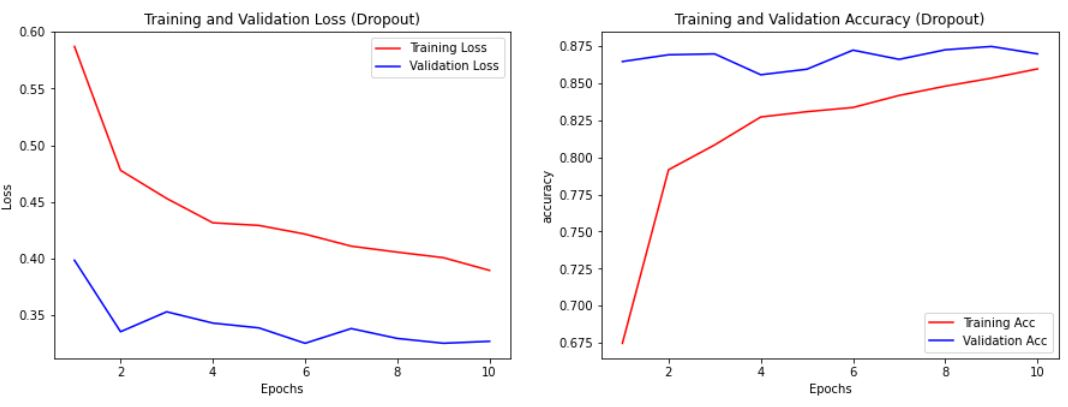

You should see improvements with Dropout regularization as well, the validation loss has improved.

## Conclusion

In this practical, we looked at how to use Keras to train a neural network for predicting sentiment on a set of review on IMDB movies. This practical shows how text data is transformed into a form that is suitable for use in training neural network using the one-hot encoding.

We also looked at how to apply L1, L2 and Dropout regularization strategies to regularize the neural network in order to reduce overfitting.